<a href="https://colab.research.google.com/github/ploybongkot/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-means

###Generate Data

In [5]:
from sklearn.datasets import make_blobs

In [6]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

### Explore data

In [7]:
X.shape

(500, 2)

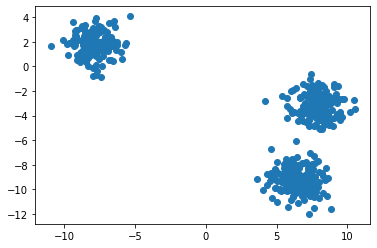

In [14]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

### Clustering

#### Import

In [9]:
from sklearn.cluster import KMeans

#### Define

In [10]:
kmeans = KMeans(n_clusters=2, random_state=6)

#### Fit-Predict

In [11]:
y_clust = kmeans.fit_predict(X)

In [12]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

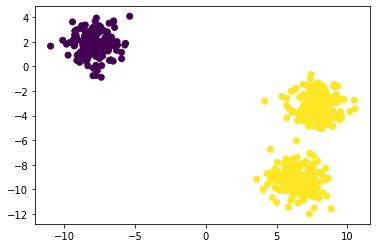

In [15]:
plt.scatter(X[:,0],X[:,1],c=y_clust)

3 clusters

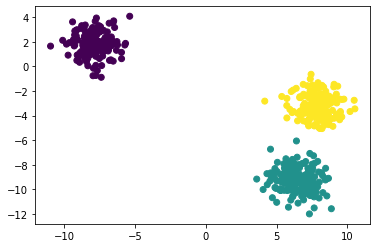

In [16]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

4 clusters

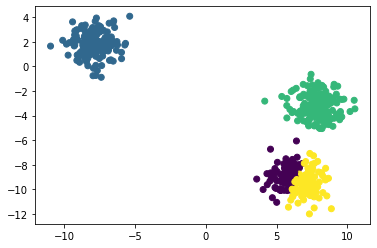

In [17]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

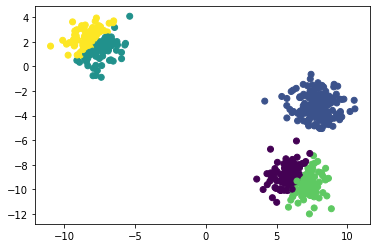

In [18]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

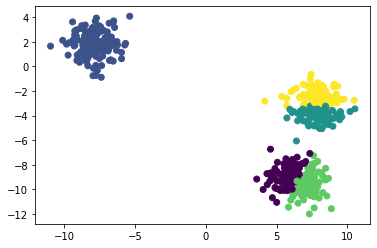

In [19]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

## Example Application (Color Quantization) การนำไปใช้ประโยชน์

In [20]:
import cv2
import os

In [26]:
img = cv2.imread('/content/Flower_1.jpg')

In [27]:
img.shape

(657, 1000, 3)

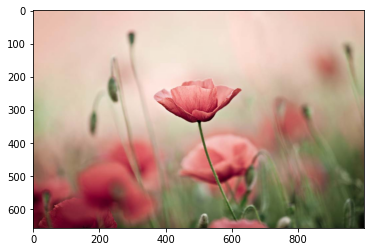

In [28]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

### นับจำนวนสี

In [29]:
import numpy as np

In [30]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(72840, 3)

### จัดกลุ่มสีให้เหลือ 16 สี

In [31]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [32]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(657000, 3)

In [33]:
final_color = myquantize.fit_predict(img_row)

### ใช้ centroid เป็นตัวแทนของสี

In [34]:
centroid = myquantize.cluster_centers_

In [35]:
centroid

array([[204.43244013, 184.26646297, 161.42105363],
       [168.01941703,  69.07924371,  72.97335372],
       [171.032331  , 140.73376542, 117.76896023],
       [ 87.52362059,  92.83098793,  59.07669911],
       [236.20008695, 208.51696959, 195.7915124 ],
       [194.87509202,  97.06889571,  93.75865031],
       [231.66357724, 158.35934959, 150.30439024],
       [114.68458693, 118.9275709 ,  82.12014797],
       [135.71825648,  38.08059591,  53.2191514 ],
       [ 56.43262549,  67.03620195,  36.92453472],
       [226.76610034, 196.80378026, 179.90192591],
       [148.59812883, 122.31513879,  96.91978329],
       [215.9623257 , 124.48666721, 117.887711  ],
       [ 96.48840755,  11.11922759,  32.60706346],
       [188.12709783, 163.49250408, 138.99047225],
       [244.16037332, 223.54063695, 210.49067299]])

แทนสีคืนลงไป

In [36]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

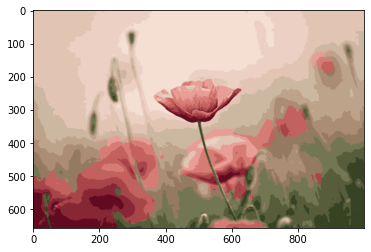

In [37]:
plt.imshow(new_img/255)

In [38]:
plt.imsave('img.jpg',new_img/255)

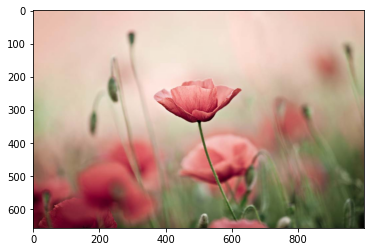

In [39]:
plt.imshow(RGB_img)

# Hierachical Clustering

https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

# Clustering Evaluation

https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation